## M6 - W8 Assignment: Deep Learning II
### Luke Barry

In [1]:
import keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import random
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

***

## Loading and Inspecting the data

In [2]:
# Load and split directly from dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5
0
4
1


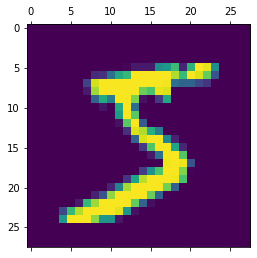

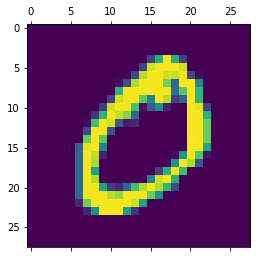

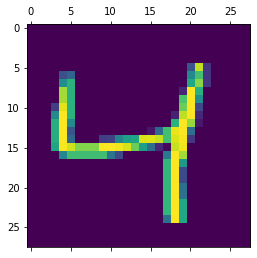

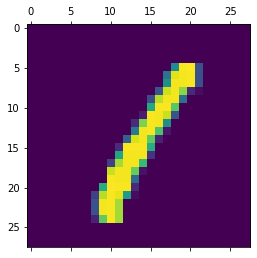

In [7]:
# Compare X/Y train
for i in list(range(0,4)):
    print(y_train[i])
    plt.matshow(X_train[i])

***

## Model Creation

In [8]:
# Flatten X_train/X_test to one dimensional shape to prepare for modelling
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
print(X_train_flat.shape, X_test_flat.shape)

(60000, 784) (10000, 784)


In [9]:
# 1st model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model_training = model.fit(X_train_flat, y_train, validation_split=0.2, epochs=20)
model_training

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 2.0316 - accuracy: 0.3226 - val_loss: 1.5791 - val_accuracy: 0.3786
Epoch 2/20
1500/1500 [==============================] - 1s 826us/step - loss: 1.4937 - accuracy: 0.5050 - val_loss: 1.3565 - val_accuracy: 0.5272
Epoch 3/20
1500/1500 [==============================] - 1s 818us/step - loss: 1.3784 - accuracy: 0.5643 - val_loss: 1.3677 - val_accuracy: 0.5675
Epoch 4/20
1500/1500 [==============================] - 1s 760us/step - loss: 1.2756 - accuracy: 0.6064 - val_loss: 1.2338 - val_accuracy: 0.6026
Epoch 5/20
1500/1500 [==============================] - 1s 952us/step - loss: 1.2351 - accuracy: 0.6469 - val_loss: 1.4031 - val_accuracy: 0.6364
Epoch 6/20
1500/1500 [==============================] - 1s 787us/step - loss: 1.1875 - accuracy: 0.6803 - val_loss: 1.1269 - val_accuracy: 0.6556
Epoch 7/20
1500/1500 [==============================] - 1s 789us/step - loss: 1.1351 - accuracy: 0.7449 - val_loss: 1.1548 - v

> The accuracy was surprisingly low. This can be imporved by scaling the data.

In [10]:
# Scale data to improve accuracy
X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [11]:
#2nd model
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model_1_training = model_1.fit(X_train_flat, y_train, epochs=20, validation_split=0.2)
model_1_training 

Epoch 1/20
1500/1500 [==============================] - 1s 770us/step - loss: 0.5331 - accuracy: 0.8674 - val_loss: 0.3206 - val_accuracy: 0.9133
Epoch 2/20
1500/1500 [==============================] - 1s 712us/step - loss: 0.3199 - accuracy: 0.9119 - val_loss: 0.2936 - val_accuracy: 0.9213
Epoch 3/20
1500/1500 [==============================] - 1s 691us/step - loss: 0.2955 - accuracy: 0.9189 - val_loss: 0.2807 - val_accuracy: 0.9230
Epoch 4/20
1500/1500 [==============================] - 1s 702us/step - loss: 0.2827 - accuracy: 0.9219 - val_loss: 0.2729 - val_accuracy: 0.9246
Epoch 5/20
1500/1500 [==============================] - 1s 693us/step - loss: 0.2749 - accuracy: 0.9236 - val_loss: 0.2711 - val_accuracy: 0.9252
Epoch 6/20
1500/1500 [==============================] - 1s 743us/step - loss: 0.2693 - accuracy: 0.9256 - val_loss: 0.2678 - val_accuracy: 0.9280
Epoch 7/20
1500/1500 [==============================] - 1s 699us/step - loss: 0.2648 - accuracy: 0.9264 - val_loss: 0.2681 -

> We can see that the model's accuracy and loss has improved. Let's try to optimize it further by tweaking the model and adding a hidden layer

In [12]:
# Adding hidden layers and tweaking model to further increase accuracy
model_2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model_2_training = model_2.fit(X_train_flat, y_train, epochs=20, validation_split=0.2)
model_2_training

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3109 - accuracy: 0.9124 - val_loss: 0.1793 - val_accuracy: 0.9507
Epoch 2/20
1500/1500 [==============================] - 1s 959us/step - loss: 0.1466 - accuracy: 0.9564 - val_loss: 0.1302 - val_accuracy: 0.9625
Epoch 3/20
1500/1500 [==============================] - 1s 968us/step - loss: 0.1001 - accuracy: 0.9703 - val_loss: 0.1046 - val_accuracy: 0.9697
Epoch 4/20
1500/1500 [==============================] - 1s 947us/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0993 - val_accuracy: 0.9699
Epoch 5/20
1500/1500 [==============================] - 1s 955us/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.0946 - val_accuracy: 0.9707
Epoch 6/20
1500/1500 [==============================] - 1s 957us/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0901 - val_accuracy: 0.9732
Epoch 7/20
1500/1500 [==============================] - 1s 962us/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0914 - v

> I experimented by adding multiple layers, but found diminishing returns after a single hidden layer. 
> Let's visualize this training data to get a better idea how the models compare.

In [13]:
# Function to compare performance of two models
def model_compare_plot(model_1_training, model_2_training):
    fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 7))
    axs[0, 0].plot(model_1_training.history['loss'], 'r', model_2_training.history['loss'], 'b')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend(('Model 1', 'Model 2'))
    axs[0, 1].plot(model_1_training.history['accuracy'], 'r', model_2_training.history['accuracy'], 'b')
    axs[0, 1].legend(('Model 1', 'Model 2'))
    axs[0, 1].set_title('Accuracy')
    axs[1, 0].plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
    axs[1, 0].set_title('Val Loss')
    axs[1, 0].legend(('Model 1', 'Model 2'))
    axs[1, 1].plot(model_1_training.history['val_accuracy'], 'r', model_2_training.history['val_accuracy'], 'b')
    axs[1, 1].set_title('Val Accuracy')
    axs[1, 1].legend(('Model 1', 'Model 2'))

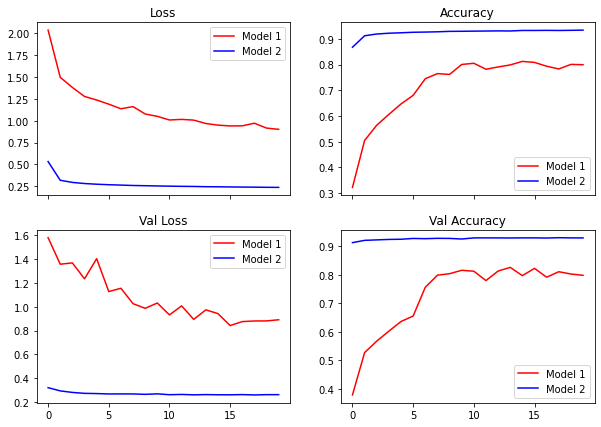

In [14]:
# Model 1 = first model
# Model 2 = second model
model_compare_plot(model_training, model_1_training)

> Our first model, Model 1 in the diagram, is clearly inferior. Let's compare the updated model with the tweaked model next

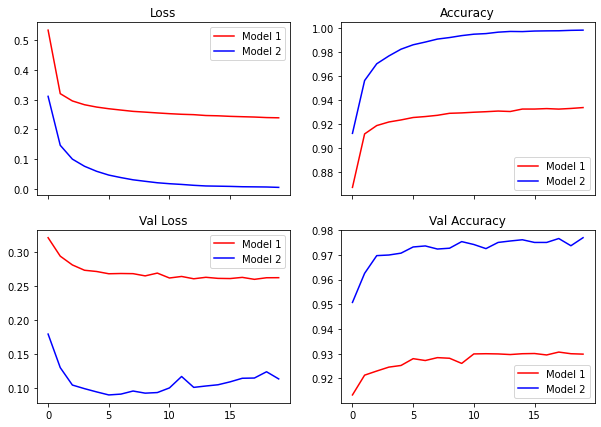

In [15]:
# Model 1 = second model
# Model 2 = third model
model_compare_plot(model_1_training, model_2_training)

> Based on the comparison of our three models, I will choose Model 2 and use 7 epochs. This should provide minmal loss while maintaining high accuracy.

In [16]:
model_2.fit(X_train_flat, y_train, epochs=7, verbose=False)

***

## Model Evaluation

In [17]:
# Evaluate test dataset
model_2.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 949us/step - loss: 0.1079 - accuracy: 0.9767


[0.10787127912044525, 0.9767000079154968]

In [18]:
# creating y_pred variable
y_pred = model_2.predict(X_test_flat)

In [19]:
# function to plot predicted outcome versus actual
def pred_test(column):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(2, 2))
    ax1.matshow(X_test[column], interpolation=None, aspect='auto')
    ax1.set_title('________________________\n\n Predicted number: ' + str(np.argmax(y_pred[column])) + '\n\n Actual Number:')
    plt.axis('off')

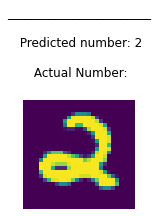

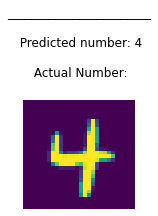

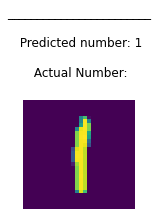

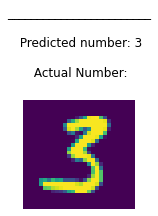

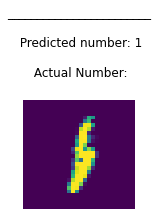

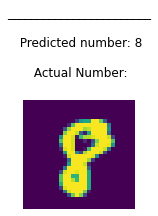

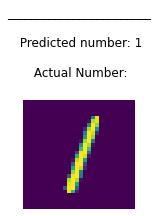

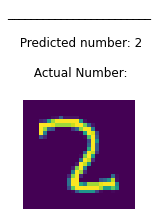

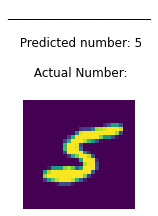

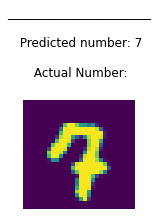

In [20]:
# Testing 10 random columns
y_pred_list = range(0, len(y_pred))
random.seed(0)
for i in random.sample(y_pred_list, 10):
    pred_test(i)

> In a random sample of 10, the predictor identified the correct number 10/10 times.

In [21]:
# Confusion matrix
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    8,    8,    1,    0,    0],
       [   0, 1111,    4,    3,    1,    3,    4,    2,    5,    2],
       [  26,    7,  899,    9,   34,   10,   15,    8,   22,    2],
       [  12,    0,   15,  868,   12,   72,    4,   10,    6,   11],
       [   1,    0,    1,    0,  923,    2,    9,    0,    1,   45],
       [  10,    2,    4,   18,   17,  801,   21,    1,   12,    6],
       [  12,    3,    5,    1,   24,   11,  902,    0,    0,    0],
       [   4,    6,   29,    2,   25,    2,    1,  911,    1,   47],
       [   8,   12,    6,   24,   65,  149,   27,   12,  612,   59],
       [  17,    6,    1,   10,   82,    9,    0,   15,    0,  869]])>

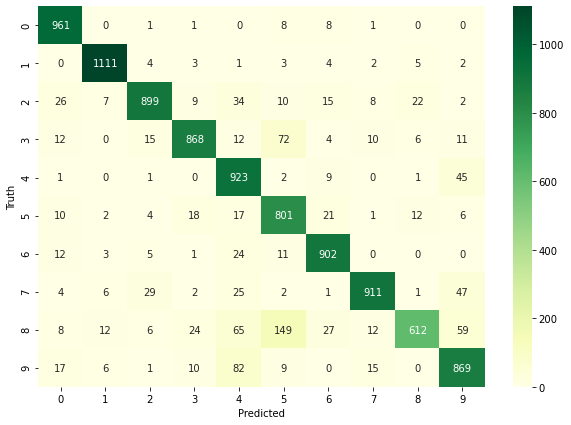

In [22]:
# Visualize confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGn")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

> The model struggles the most recognizing the number 8, only predicting correctly 801 times. The missed values consist mostly of 5 (149).


> The model performs best with 1, predicting it correctly 1111 times.